# Second-Phase-Evaluation-Projects--1-

# Global Power Plant Database Project

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Table Of Content

1.Importing Libraries
2.Importing Data
3.Extraplotary Data Analysis
4.Data Visualization
5.Data Exploration
6.Feature Engineering
7.Best model selection
8.Saving the model


# 1.Importing libraries

In [1]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessor, Scaler, Sampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Evaluation & Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

#Saving Model
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# 2.Importing Data

In [2]:
df = pd.read_csv('C:/Users/Sayan Mondal/Downloads/database_IND (1).csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3.Extraplotary Data Analysis

A.Data Description

In [16]:
df.shape

(907, 27)

In [5]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381062,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [6]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [35]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

B.Checking For Any Duplicate Values In The Dataset

In [11]:
df.duplicated().sum()

0

C.Chechking For Any NaN, White Space, - Values

In [12]:
df.isin([' ','NaN','-']).sum().any()

False

D.Checking For Missing Values

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

E.Unique values of the Dataset

In [17]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column {col}: {unique_values}")

Unique values in column country: ['IND']
Unique values in column country_long: ['India']
Unique values in column name: ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 

The Data has diffenrent numerical and categorical which are needed to be separeted for better visualization results. Also trating the missing values by dropping few columns and modifying the data leaded to a better result in modelling

# 4. Data Visualization

A.No.of unique value visuals

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<Axes: xlabel='primary_fuel', ylabel='count'>

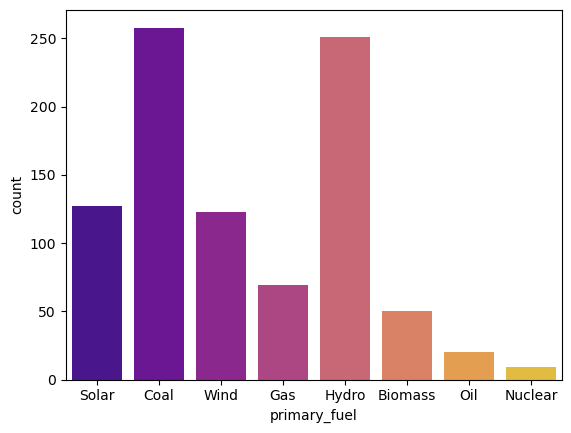

In [24]:
print(df['primary_fuel'].value_counts())
sns.countplot(x='primary_fuel', data=df, palette='plasma')


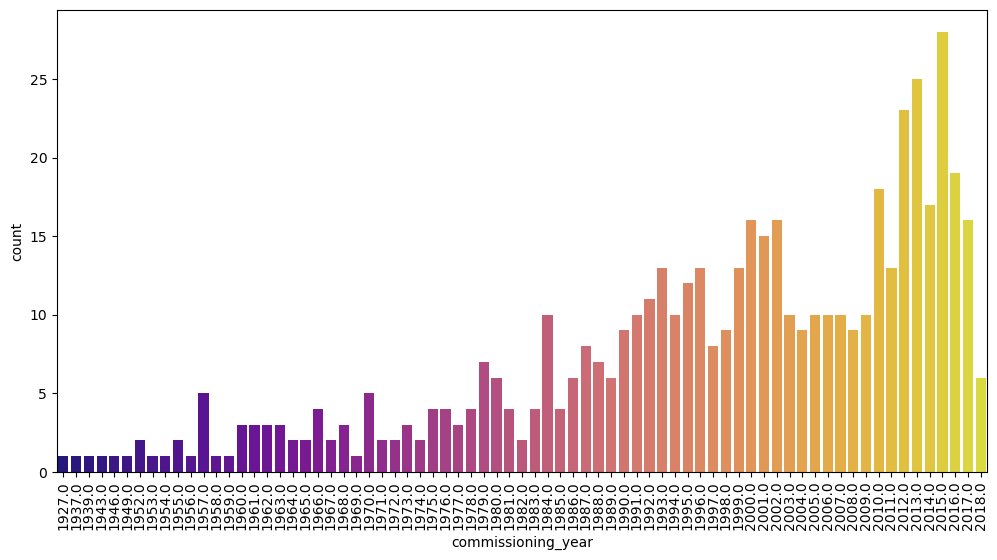

In [26]:
# Plotting the count of commissioning years
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='commissioning_year', data=df, palette='plasma')

# Rotating x-axis labels
plt.xticks(rotation=90)

plt.show()

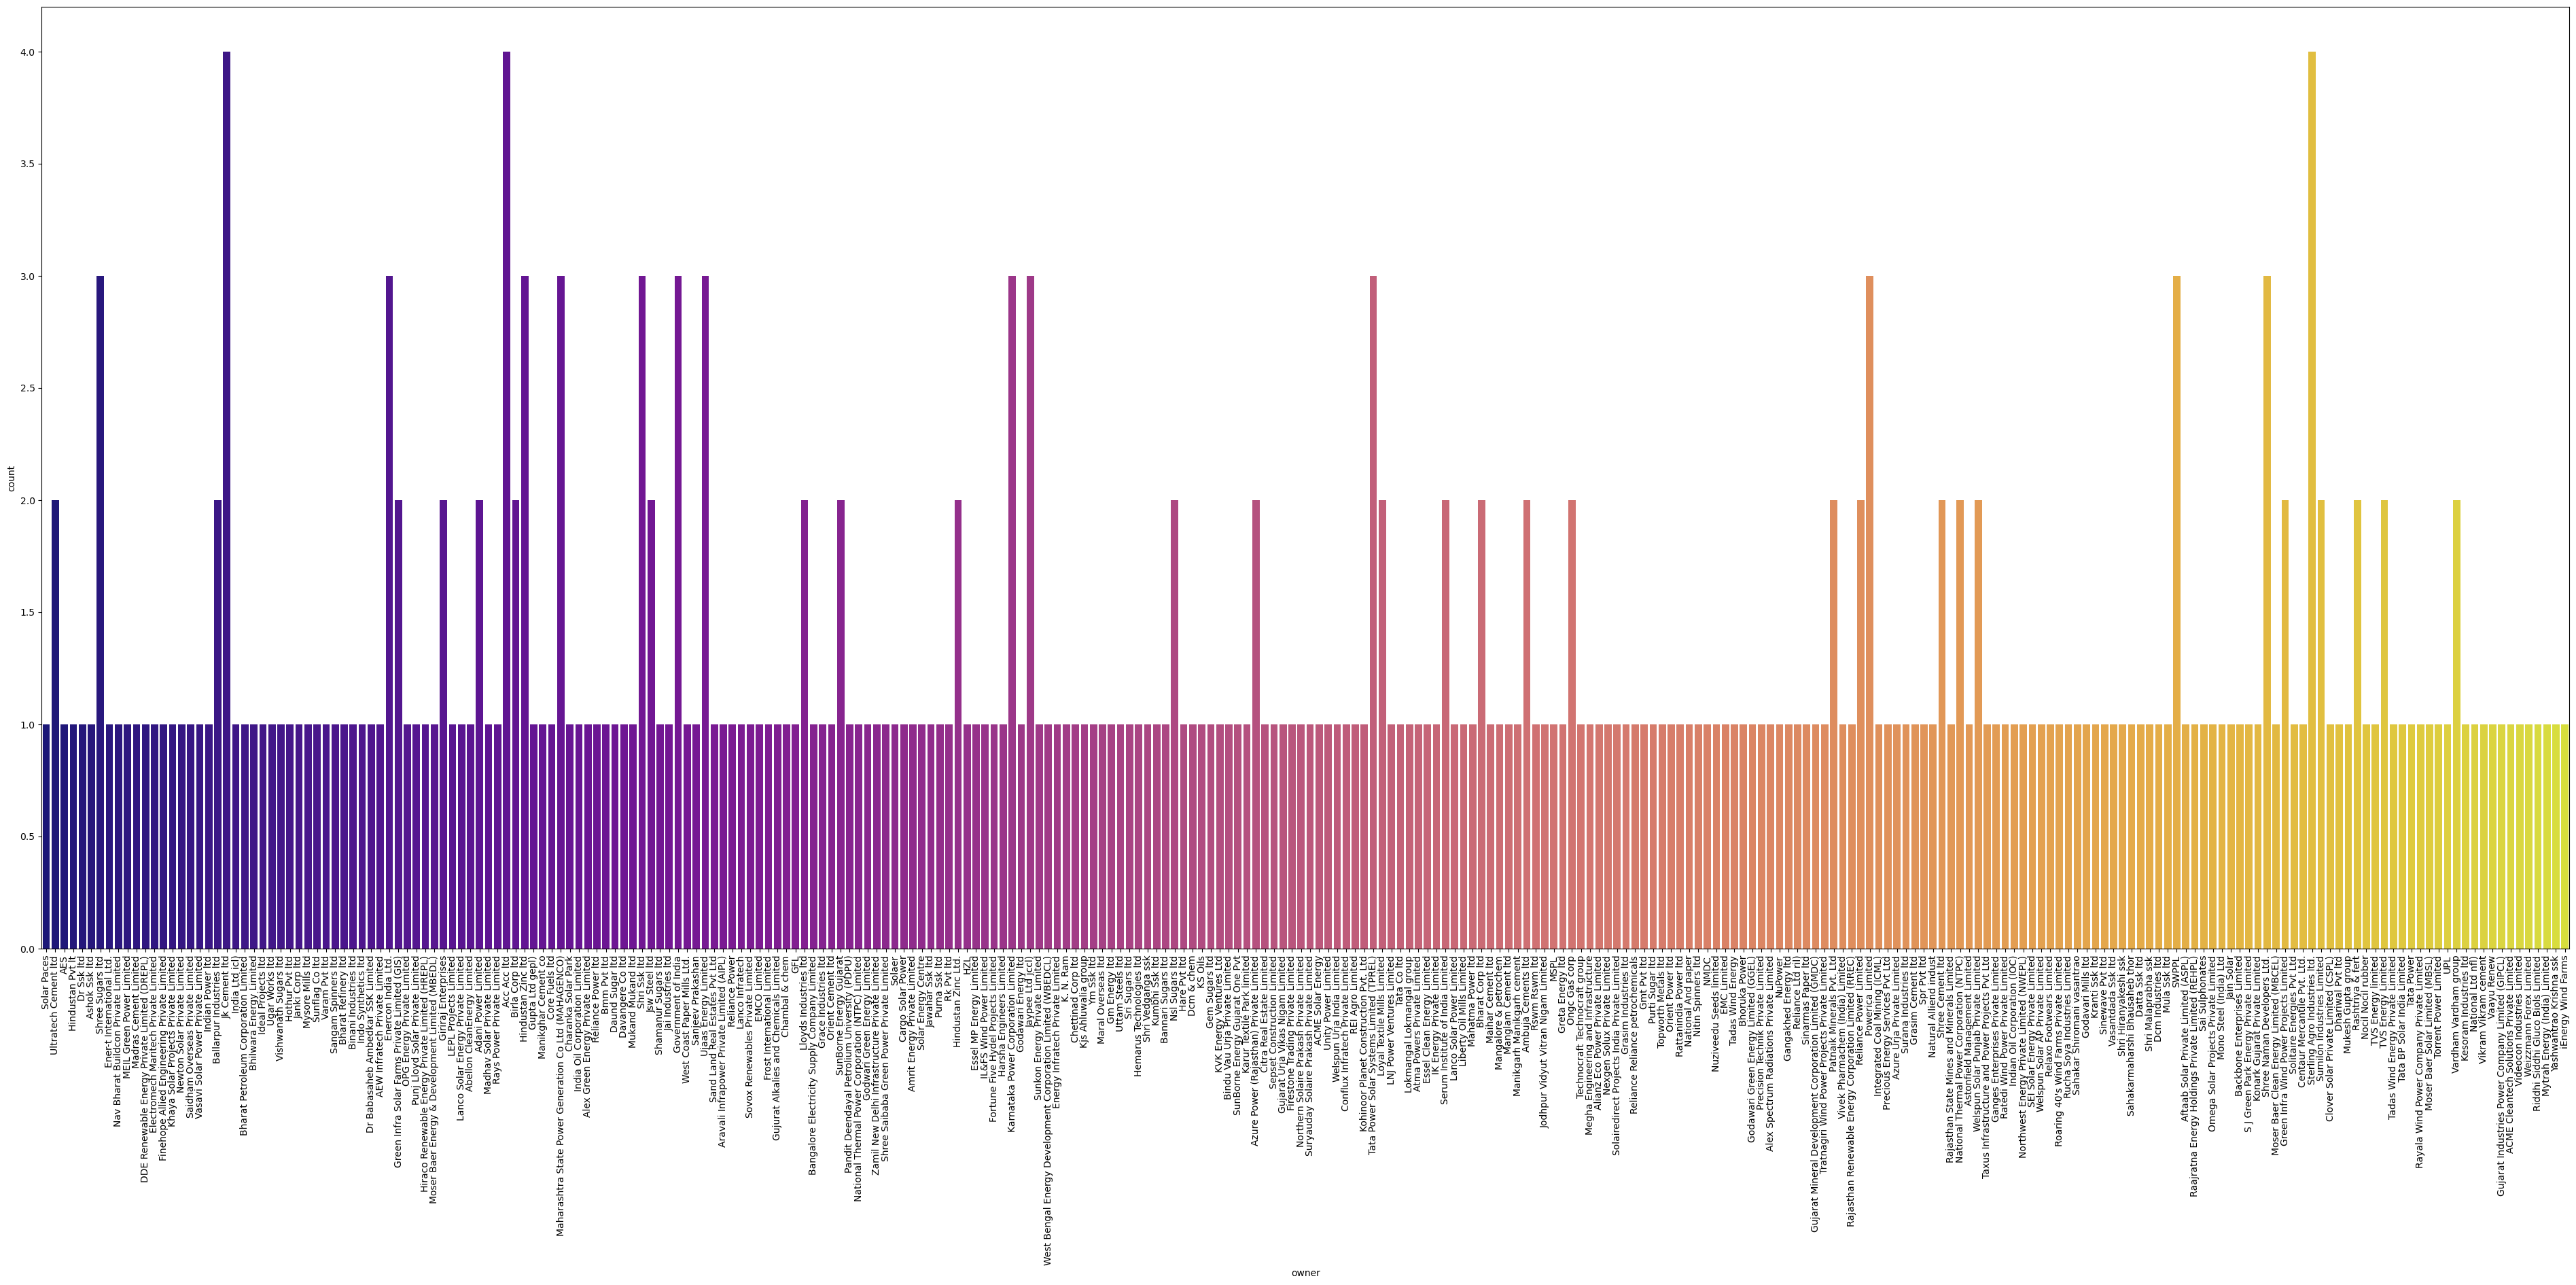

In [33]:
# Plotting the count of owner
plt.figure(figsize=(48, 18))
ax = sns.countplot(x='owner', data=df, palette='plasma')

# Rotating x-axis labels
plt.xticks(rotation=90)

plt.show()

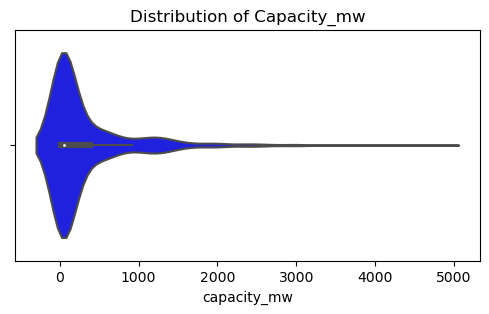

In [34]:
# Visualizing It
plt.figure(figsize=(6,3))
sns.violinplot(x=df.capacity_mw, color='blue')
plt.title('Distribution of Capacity_mw')
plt.show()

B.Visually Comparing Primary Fuel With Other Features

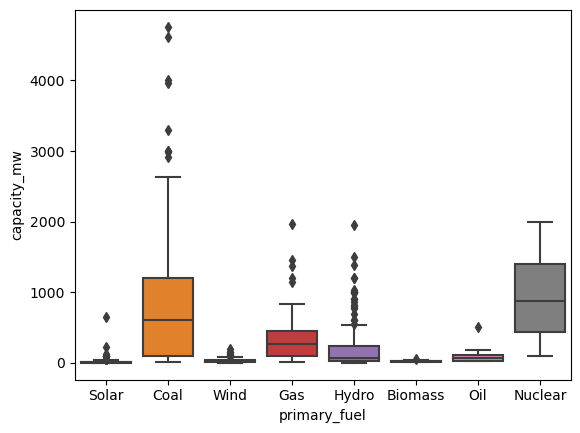

In [38]:
#Boxplot: 
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df) 
plt.show()

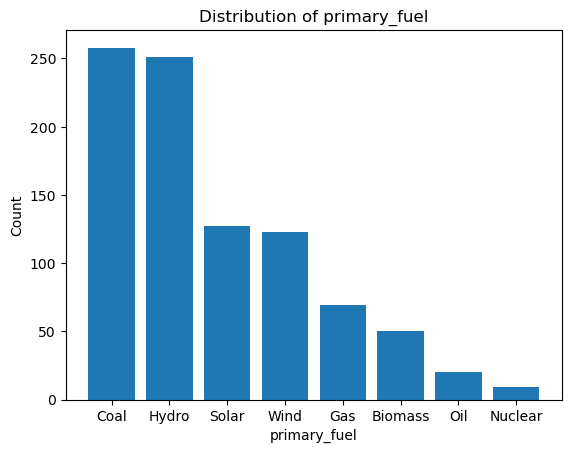

In [40]:
# 1. Bar Chart
def plot_bar_chart(feature):
    counts = df[feature].value_counts()
    plt.bar(counts.index, counts.values)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.show()

plot_bar_chart('primary_fuel')


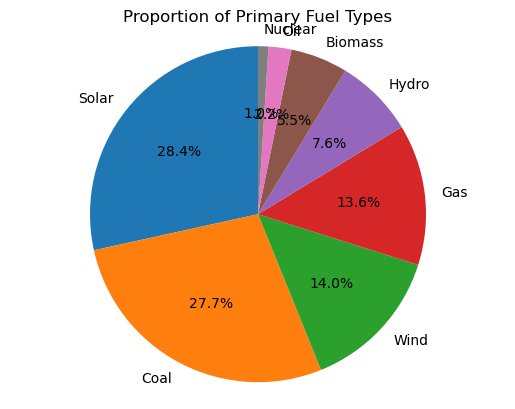

In [42]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and primary_fuel is the feature you want to compare
labels = df['primary_fuel'].unique()
sizes = df['primary_fuel'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Proportion of Primary Fuel Types')
plt.show()

In [5]:
# Comparison of primary_fuel with other features
def compare_primary_fuel_with_other_features():
    features_of_interest = ['country', 'other_fuel1', 'other_fuel2']
    
    for feature in features_of_interest:
        if feature != 'primary_fuel':  # Skip comparing primary_fuel with itself
            plt.figure(figsize=(10, 6))
            df.groupby('primary_fuel')[feature].value_counts().unstack().plot(kind='bar', stacked=True)
            plt.title(f'Comparison of primary_fuel with {feature}')
            plt.xlabel('primary_fuel')
            plt.ylabel('Count')
            plt.show()

<Figure size 1000x600 with 0 Axes>

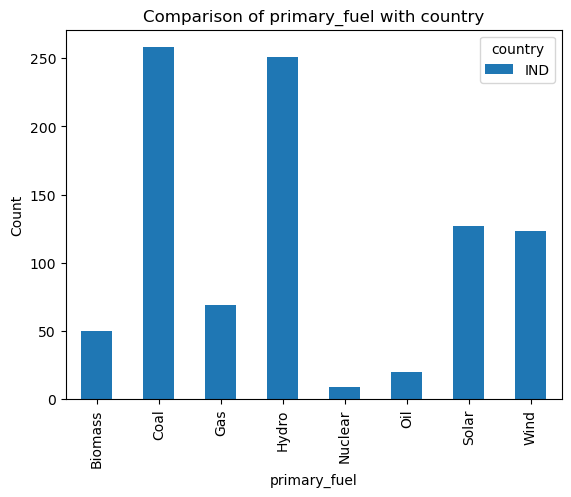

<Figure size 1000x600 with 0 Axes>

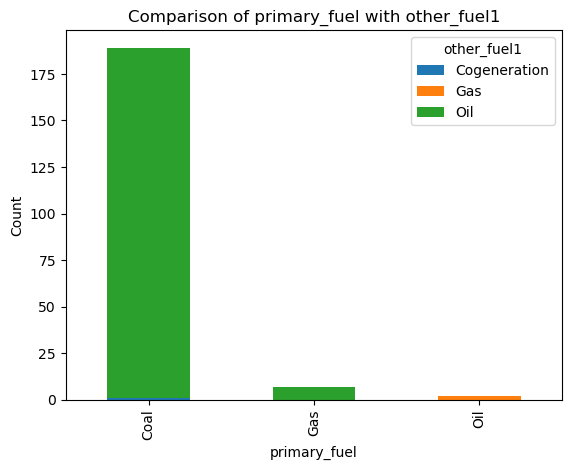

<Figure size 1000x600 with 0 Axes>

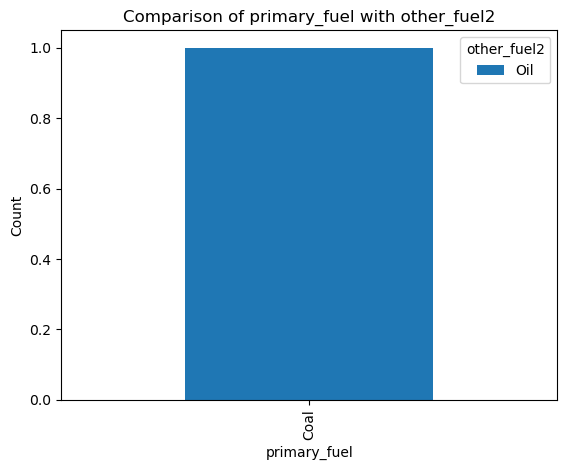

In [6]:
compare_primary_fuel_with_other_features()

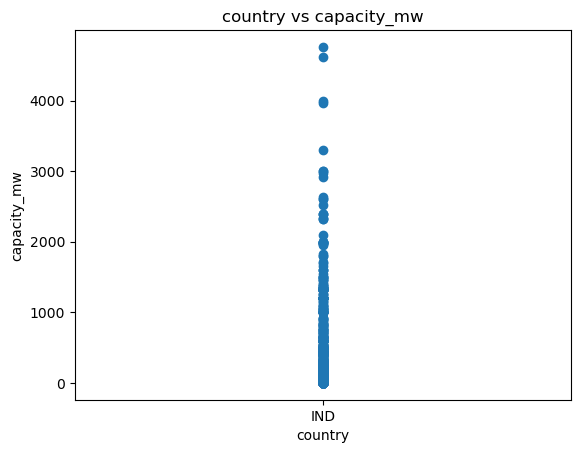

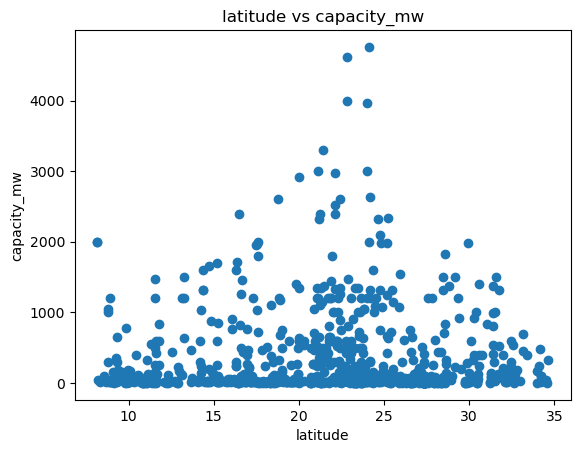

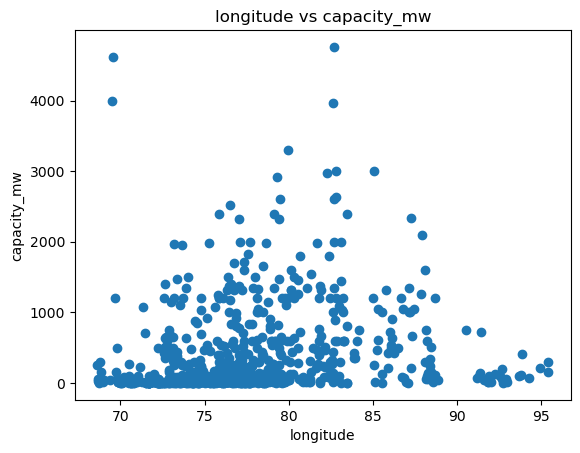

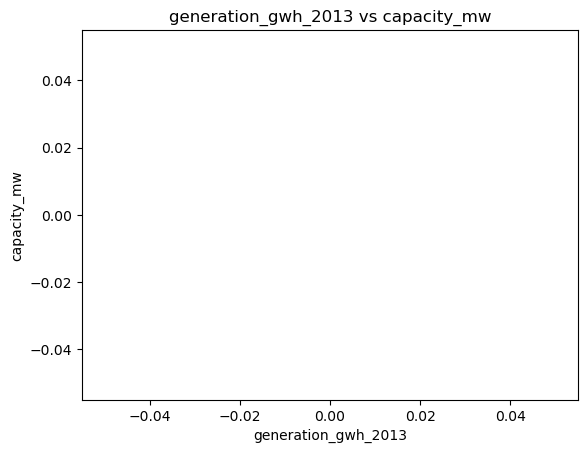

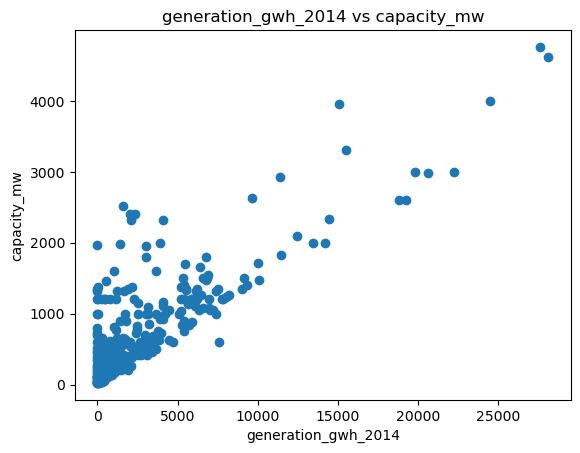

In [7]:
# Visual comparison of capacity_mw with other specified columns
def visual_comparison_capacity_mw_with_others():
    features_to_compare = ['country', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014']

    for feature in features_to_compare:
        if feature != 'capacity_mw':  # Skip comparing capacity_mw with itself
            plt.scatter(df[feature], df['capacity_mw'])
            plt.xlabel(feature)
            plt.ylabel('capacity_mw')
            plt.title(f'{feature} vs capacity_mw')
            plt.show()

visual_comparison_capacity_mw_with_others()

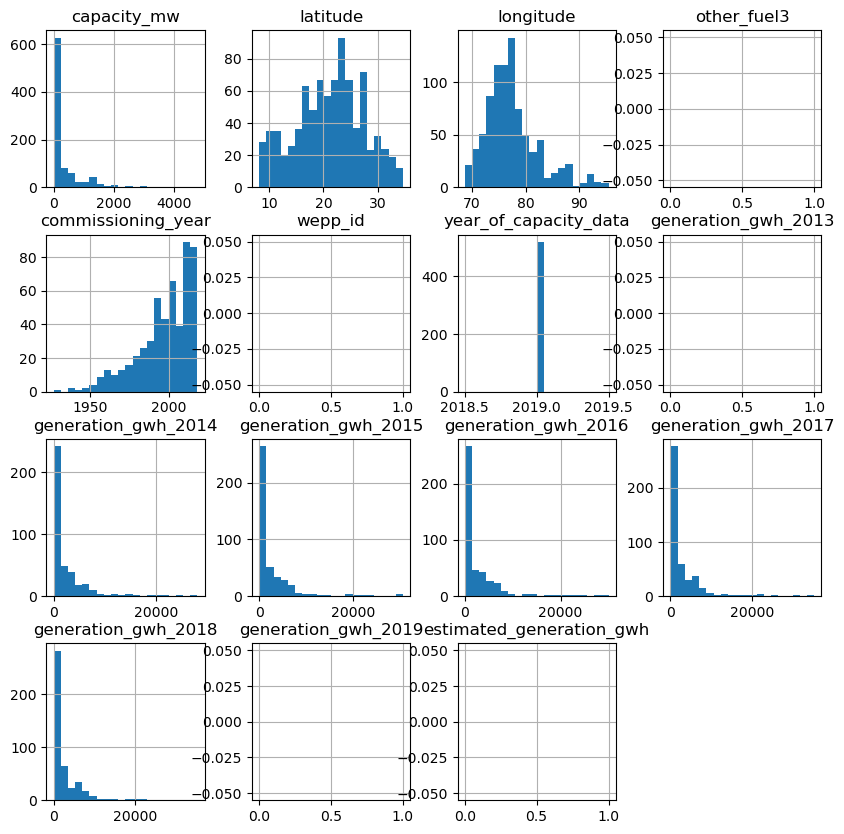

In [8]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

# 5. Data Exploration with different features

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

The dataset contains few columns that are entirely vacant without any value in it. Thus it is better to remove them for best results in modelling and prediction.

In [3]:
# Remove 'country','country_long', 'estimated_generation_gwh','url', 'wepp_id','year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2019','generation_data_source', 'other_fuel2' and 'other_fuel3' columns
df = df.drop(['country','country_long', 'estimated_generation_gwh', 'other_fuel2', 'other_fuel3', 'url', 'wepp_id','year_of_capacity_data', 'generation_gwh_2013','generation_data_source', 'generation_gwh_2019'], axis=1)

print(df)

                             name   gppd_idnr  capacity_mw  latitude  \
0                ACME Solar Tower  WRI1020239          2.5   28.1839   
1             ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663   
2        AES Saurashtra Windfarms  WRI1026669         39.2   21.9038   
3                     AGARTALA GT  IND0000001        135.0   23.8712   
4                    AKALTARA TPP  IND0000002       1800.0   21.9603   
..                            ...         ...          ...       ...   
902                  YERMARUS TPP  IND0000513       1600.0   16.2949   
903  Yelesandra Solar Power Plant  WRI1026222          3.0   12.8932   
904  Yelisirur wind power project  WRI1026776         25.5   15.2758   
905                   ZAWAR MINES  WRI1019901         80.0   24.3500   
906       iEnergy Theni Wind Farm  WRI1026761         16.5    9.9344   

     longitude primary_fuel other_fuel1  commissioning_year  \
0      73.2407        Solar         NaN              2011.0   
1      74

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   other_fuel1          198 non-null    object 
 7   commissioning_year   527 non-null    float64
 8   owner                342 non-null    object 
 9   source               907 non-null    object 
 10  geolocation_source   888 non-null    object 
 11  generation_gwh_2014  398 non-null    float64
 12  generation_gwh_2015  422 non-null    float64
 13  generation_gwh_2016  434 non-null    float64
 14  generation_gwh_2017  440 non-null    float64
 15  generation_gwh_2018  448 non-null    flo

In [4]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [18]:
disc_col = []
for column in df.columns:
   print(f"{column} : {df[column].unique()}")
   disc_col.append(column)
   print("====================================")

name : ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP'
 'BAGLIHAR HEP' 'BAGLIHAR HEP-II' 'BAIRA SIUL' 'BAKRESWAR' 'BALCO TPP'
 'BALIMELA' 'BALLARPUR BIL

In [5]:
df.drop(columns=['name','gppd_idnr','owner'], axis=1, inplace=True)
df.shape

(907, 13)

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

print('Categorical columns are: ',categorical_columns)
print('\n')
print('Numerical_columns are: ',numerical_columns)

Categorical columns are:  Index(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], dtype='object')


Numerical_columns are:  Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')


In [7]:
# Imputation techniques
impute_techniques = {
    'other_fuel1': 'mode',
    'geolocation_source': 'mode',
    'source':'mode',
    'latitude': 'mean',
    'longitude': 'mean',
    'commissioning_year': 'median',
    'generation_gwh_2014': 'median',
    'generation_gwh_2015': 'median',
    'generation_gwh_2016': 'median',
    'generation_gwh_2017': 'median',
    'generation_gwh_2018': 'median'
}

# Impute based on defined techniques
for column, technique in impute_techniques.items():
    if technique == 'mode':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif technique == 'median':
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)


In [8]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [23]:
skewness = df.skew()
skewness

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.719575
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [24]:
## Print the total power generation capacity of all power plants
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')
print('\n')

# Checking Generation of Capity_MW by Primary Fuel
capacity_by_primary_fuel = df.groupby("primary_fuel")["capacity_mw"].sum()

# Calculate the percentage
percentage_by_primary_fuel = round((capacity_by_primary_fuel / df['capacity_mw'].sum()) * 100,2)

# Create a DataFrame to display capacity and percentage
capacity_and_percentage_df = pd.DataFrame({
    "Power Generation Capacity (MW)": capacity_by_primary_fuel,
    "Percentage of Total Capacity (%)": percentage_by_primary_fuel
})

capacity_and_percentage_df

Total Power Generation Capacity of all Power Plants: 295884.946 MW




,Power Generation Capacity (MW),Percentage of Total Capacity (%)
primary_fuel,,
Biomass,1003.260,0.34
Coal,205839.220,69.57
Gas,25172.506,8.51
Hydro,46441.770,15.70
Nuclear,8780.000,2.97
Oil,1778.840,0.60
Solar,2757.500,0.93
Wind,4111.850,1.39


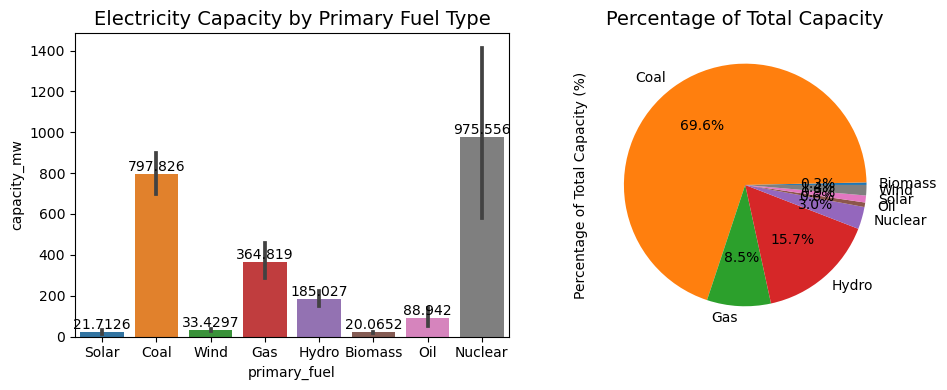

In [32]:
# Visualizing it
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First plot using barplot
ax = sns.barplot(x="primary_fuel", y="capacity_mw", data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title("Electricity Capacity by Primary Fuel Type", fontsize=14)

#Second plot using pie plot  for percentage
capacity_and_percentage_df['Percentage of Total Capacity (%)'].plot(kind="pie", autopct="%0.1f%%", ax=axes[1])
axes[1].set_title("Percentage of Total Capacity", fontsize=14)

plt.tight_layout()
plt.show()

In [25]:
# finding details about Smallest & Biggest Powerplant
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [26]:
# checking Smallest & Biggest Powerplant in our dataframe
df.loc[(df['capacity_mw'] == 4760) | (df['capacity_mw'] == 0)]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
829,0.0,12.8491,77.6752,Solar,Oil,2001.0,Tata BP Solar India Limited,Industry About,801.123775,711.181225,737.20545,817.97725,751.644375
880,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.000000,29047.000000,30015.00000,35116.00000,35136.000000


In [27]:
categorical_columns

Index(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], dtype='object')

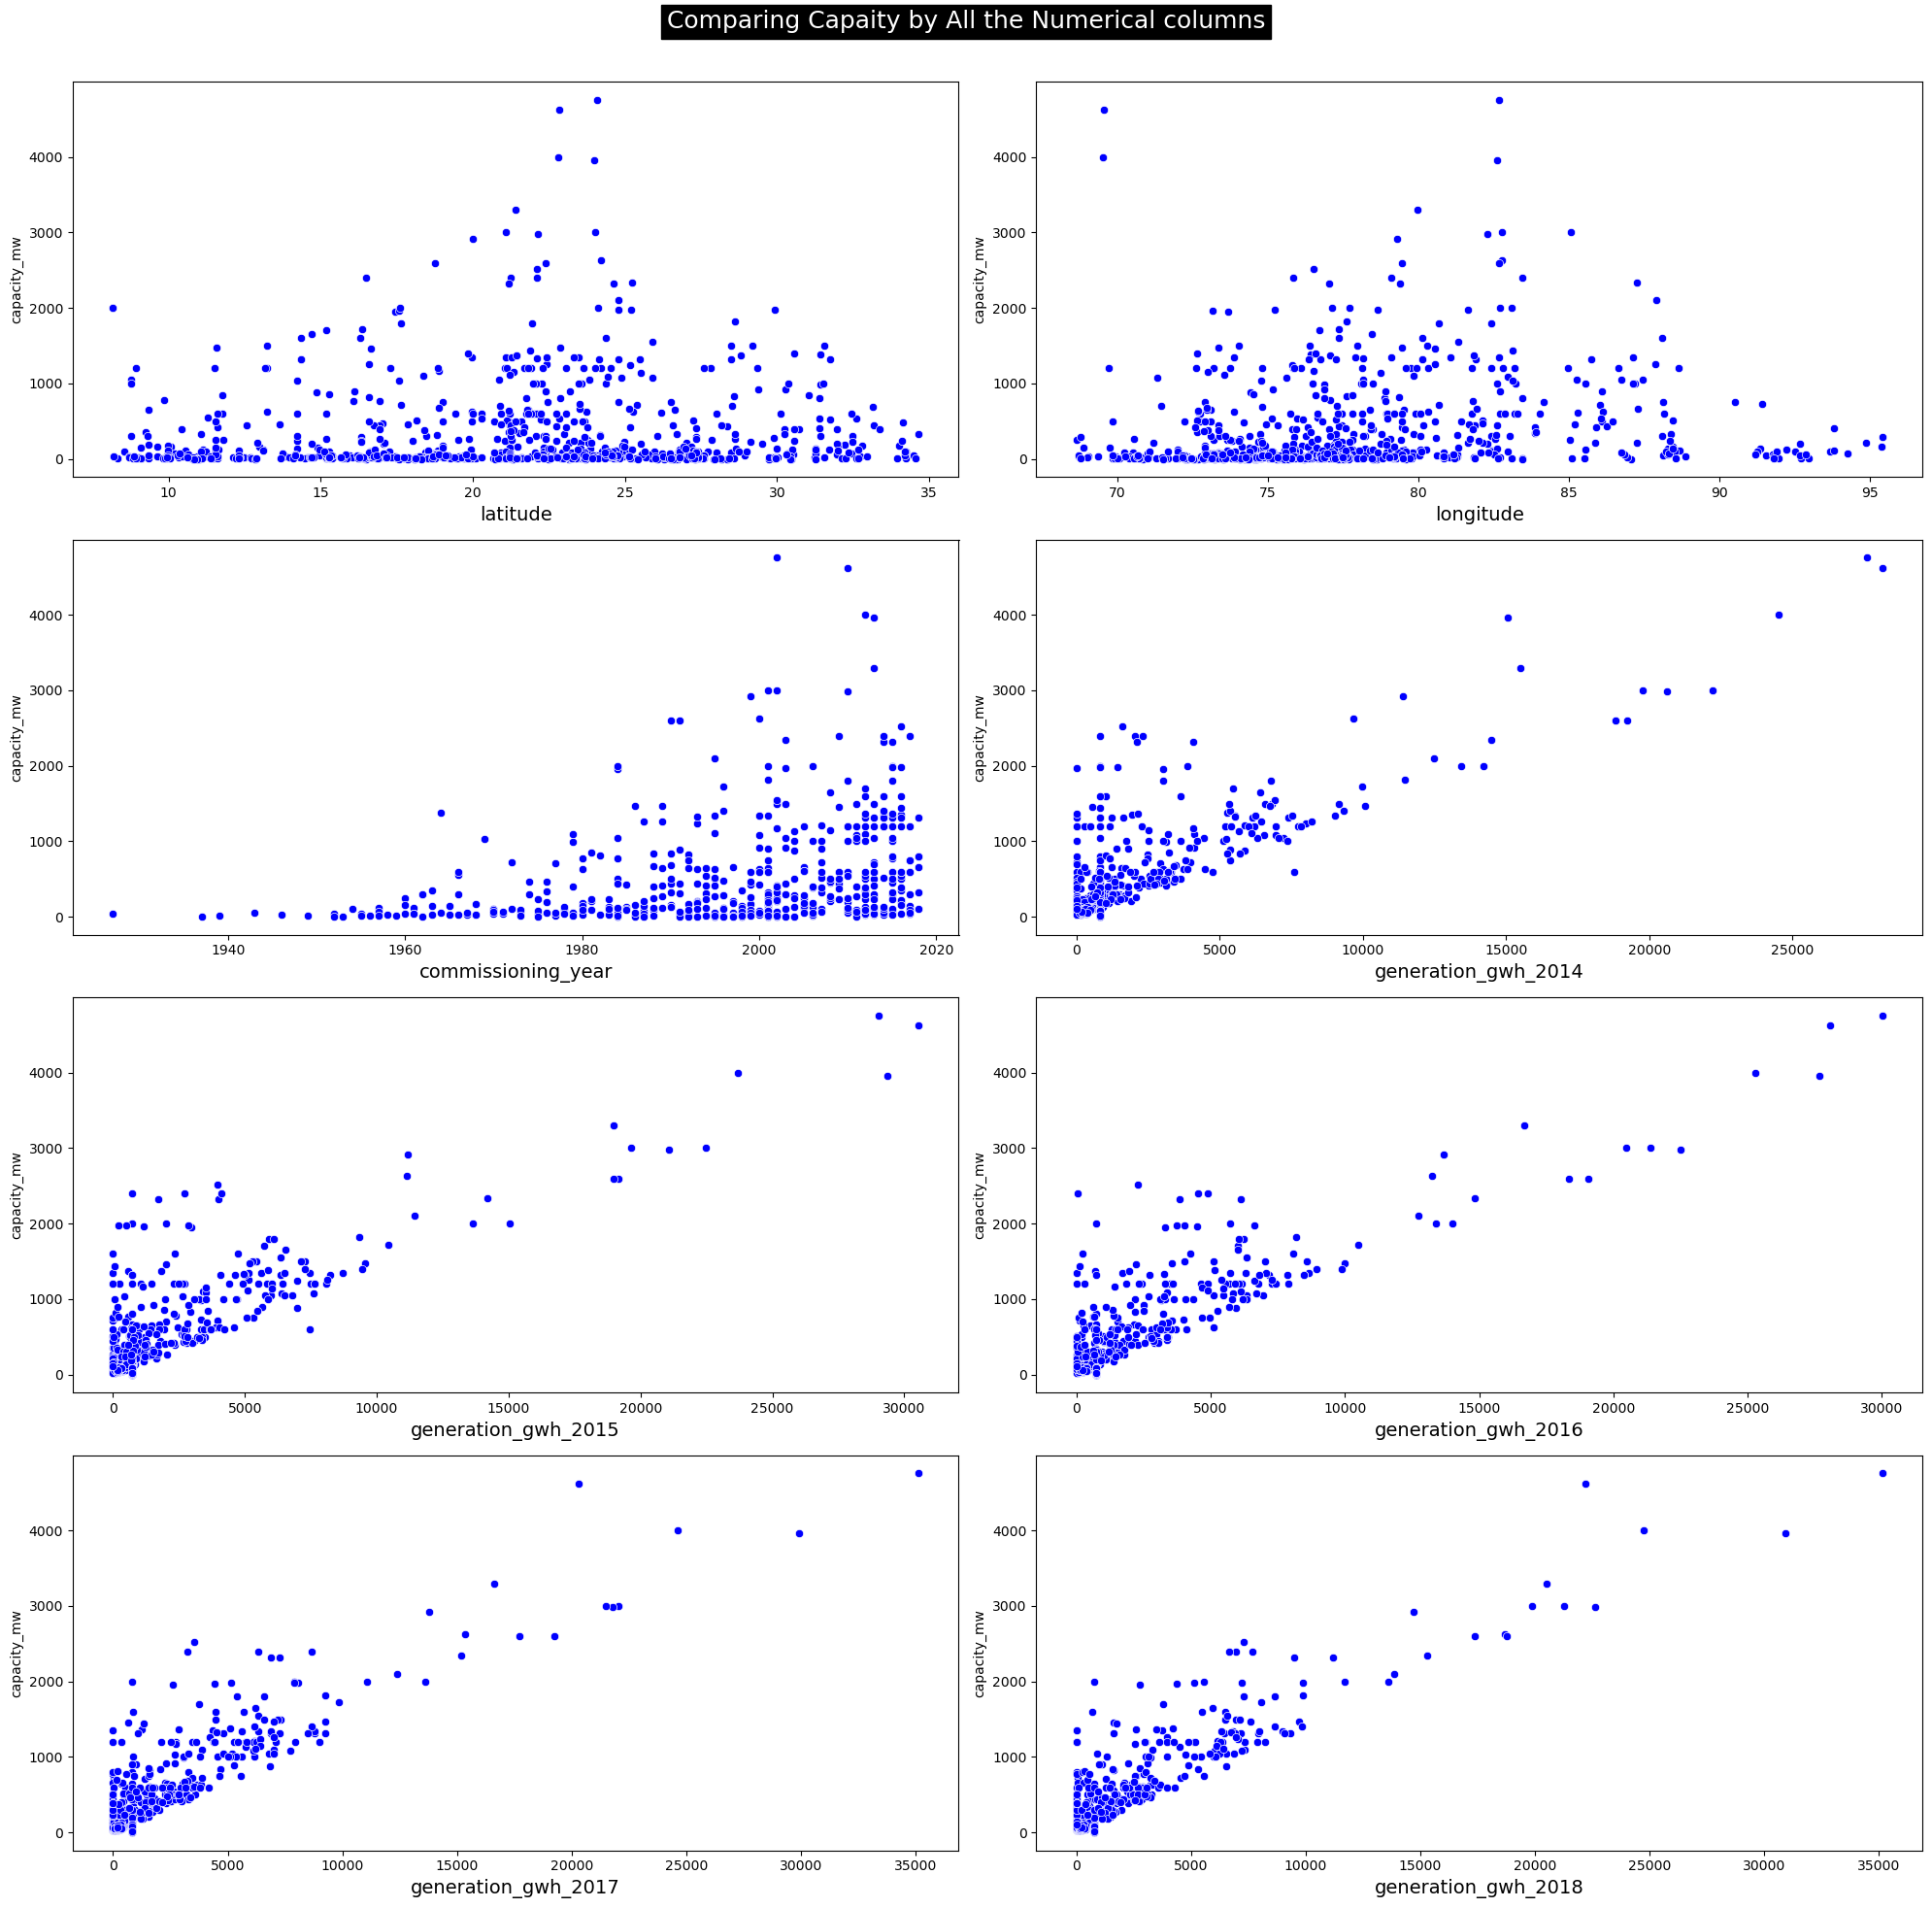

In [28]:
# visualizing it
plt.figure(figsize=(20,20))
fig = plt.gcf()
fig.suptitle("Comparing Capaity by All the Numerical columns", fontsize=18, backgroundcolor='black', color='white')
plotnumber=1
for col in numerical_columns[1:]:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.scatterplot(x=df[col],y=df['capacity_mw'],color='blue')
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

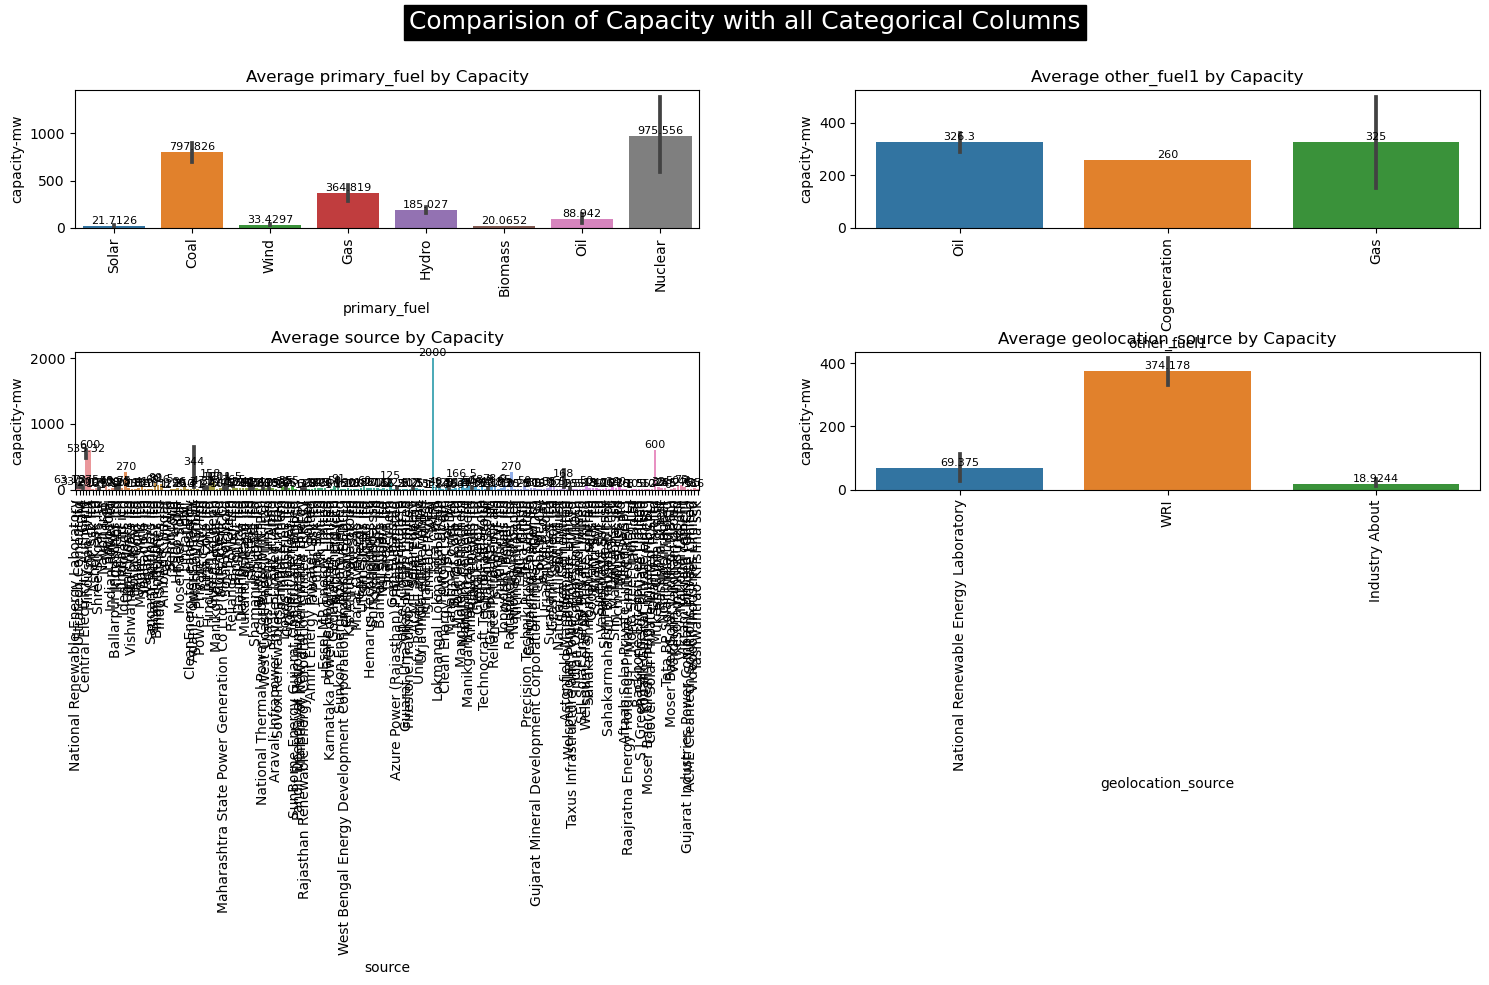

In [29]:
# Visualizing it:
plt.figure(figsize=(15, 10))
plt.suptitle("Comparision of Capacity with all Categorical Columns", fontsize=18, backgroundcolor='black', color='white')

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i+1)
    
    # Create a side-by-side bar plot for the current numerical column
    ax = sns.barplot(x=col, y='capacity_mw', data=df)
    
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)
    
    plt.title(f"Average {col} by Capacity", fontsize=12)
    plt.xlabel(f"{col}")
    plt.ylabel("capacity-mw")
    
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.9, wspace=0.25)
plt.show()

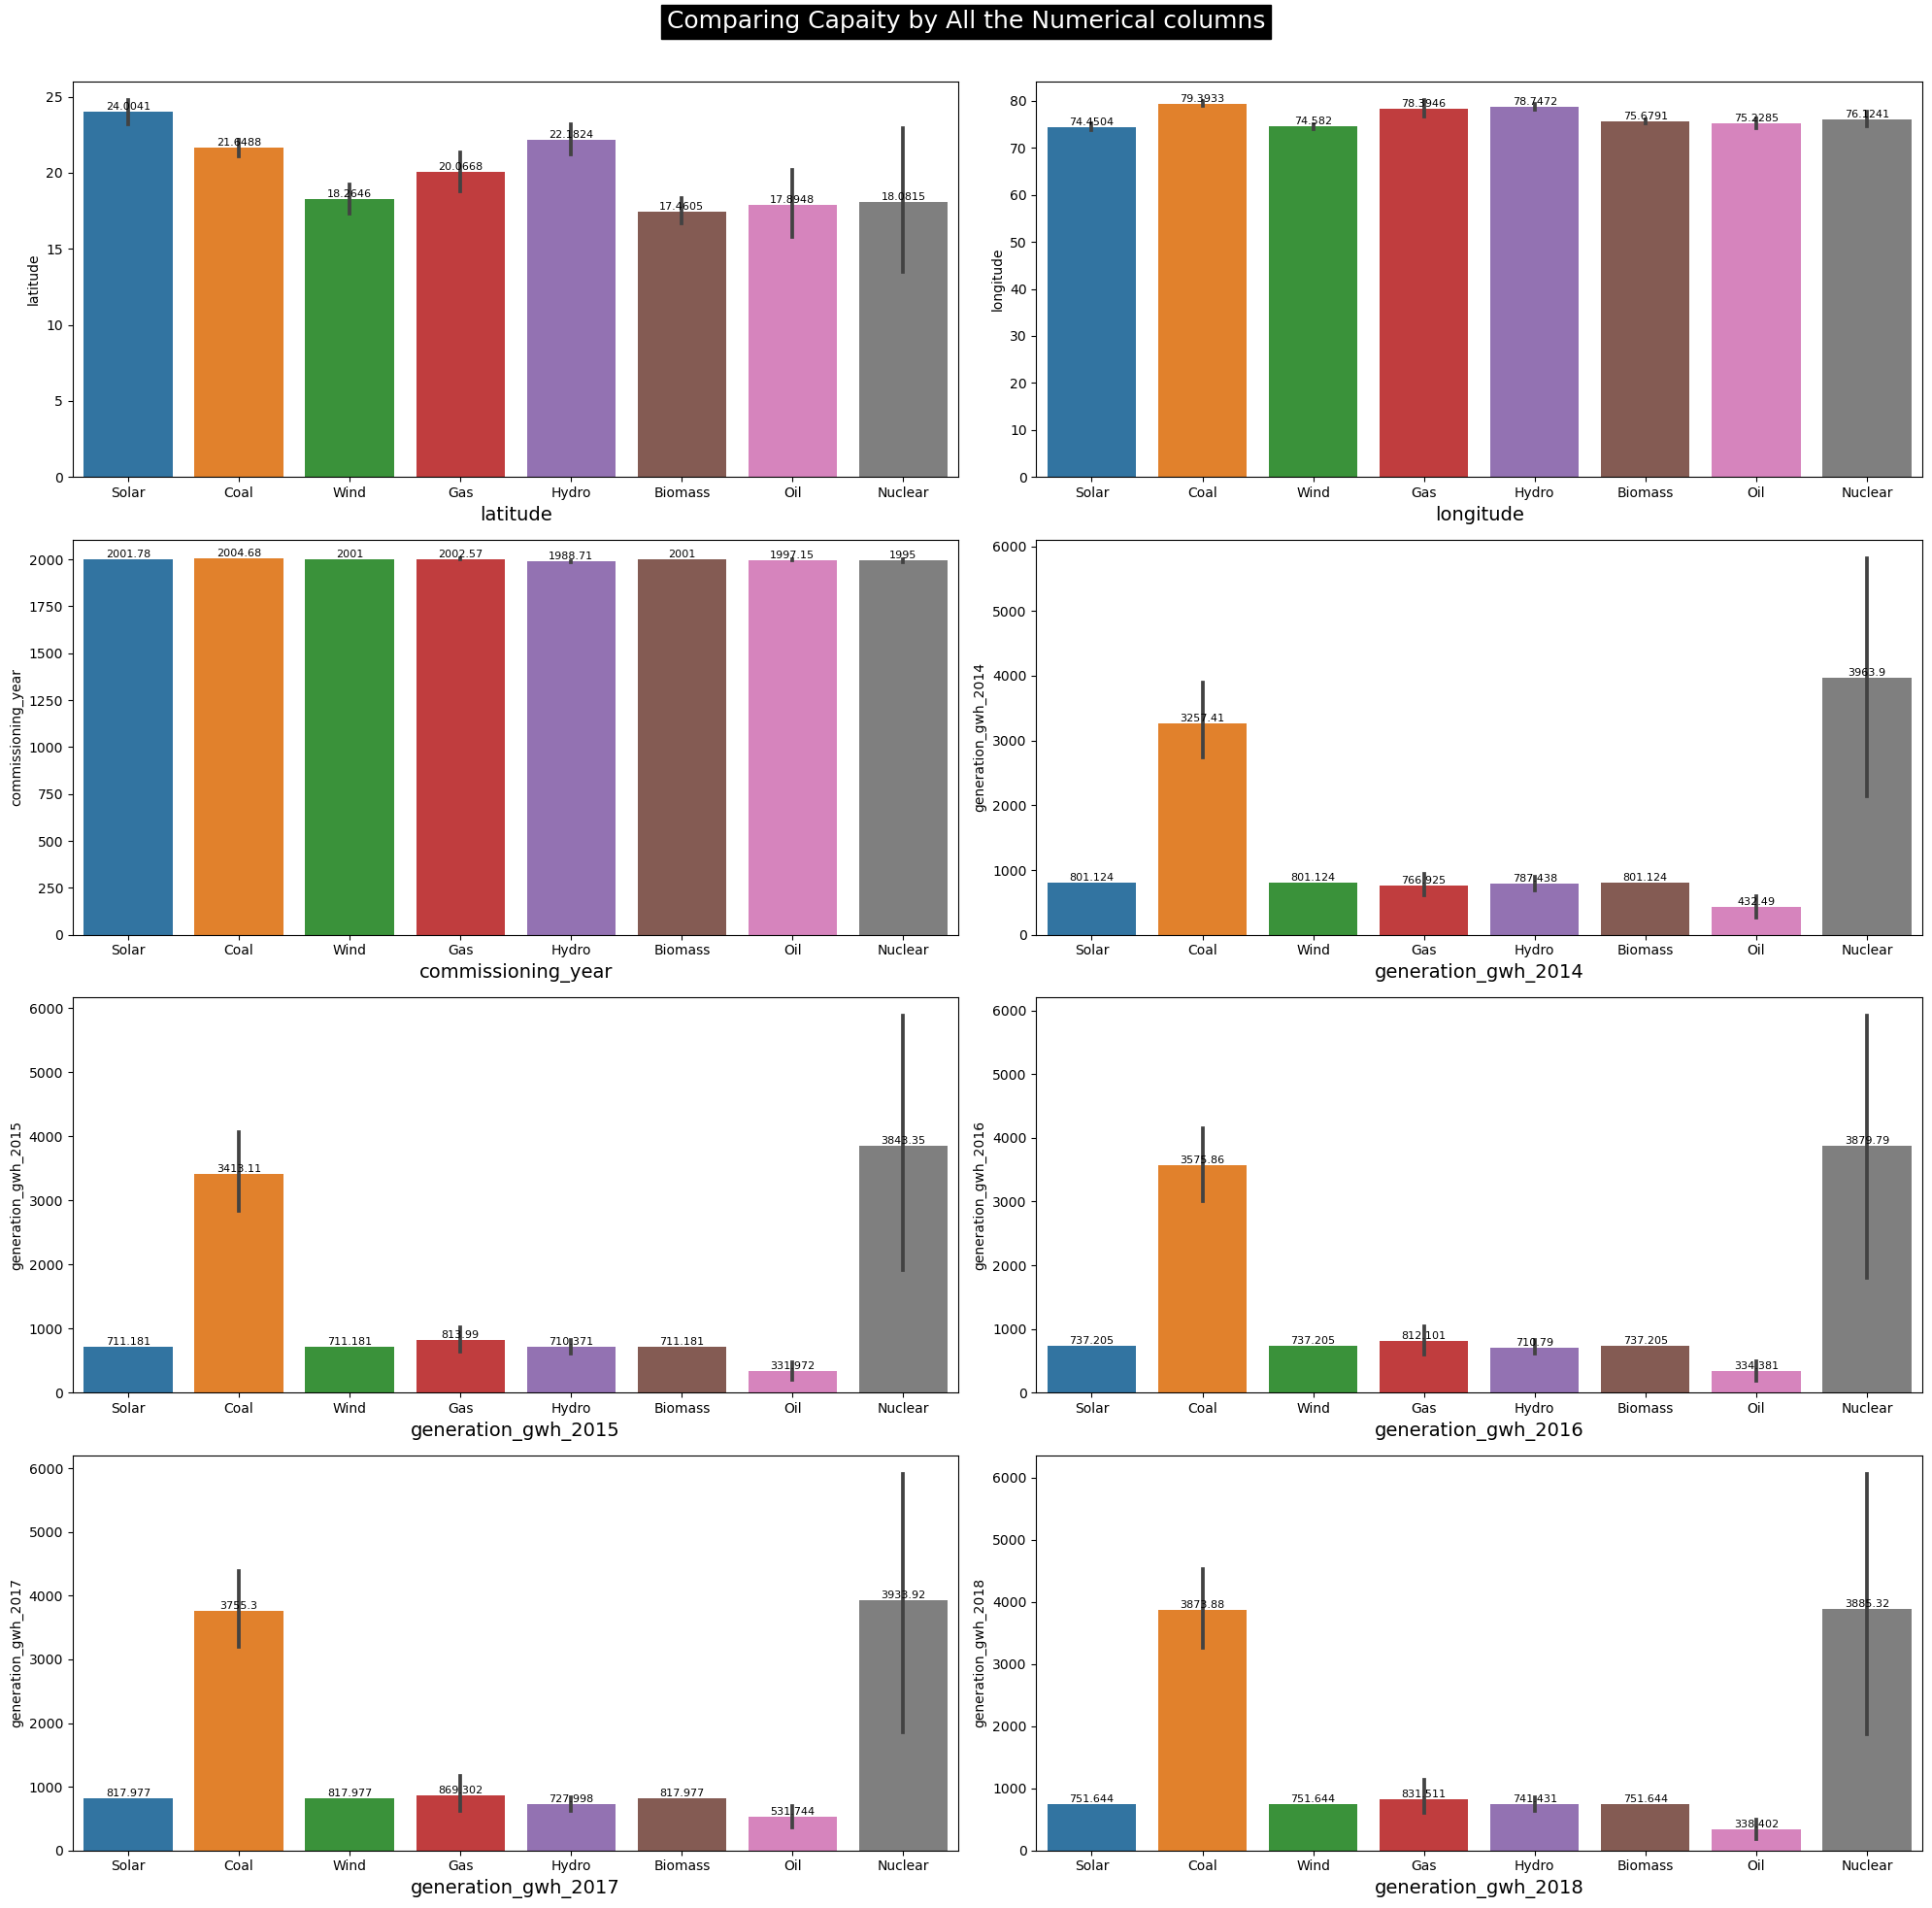

In [30]:
# visualizing it
plt.figure(figsize=(20,20))
fig = plt.gcf()
fig.suptitle("Comparing Capaity by All the Numerical columns", fontsize=18, backgroundcolor='black', color='white')
plotnumber=1
for col in numerical_columns[1:]:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.barplot(x='primary_fuel',y=col, data=df)
        for container in ax.containers:
            ax.bar_label(container, fontsize=8)
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

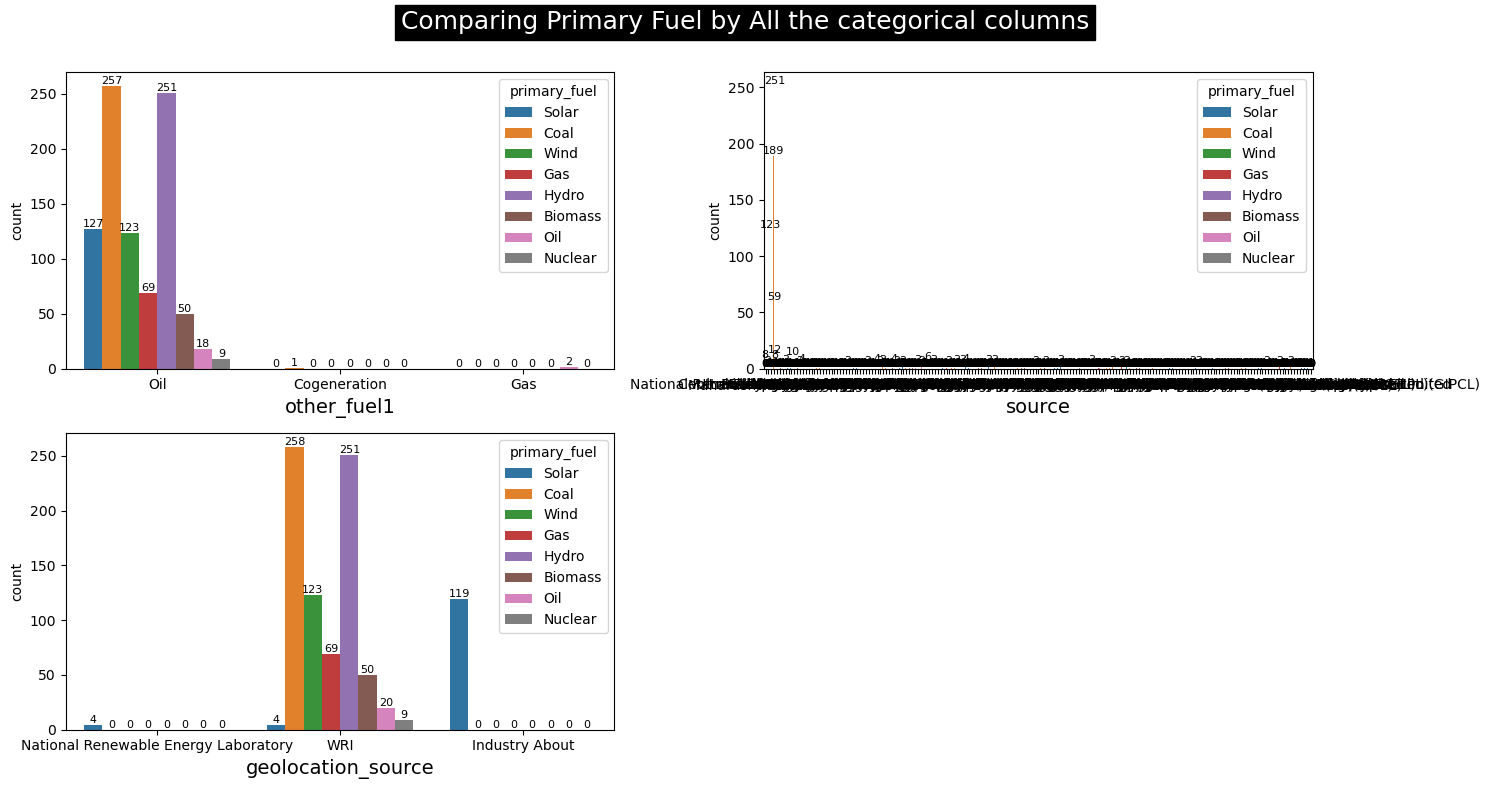

In [31]:
# visualizing it
plt.figure(figsize=(15,8))
fig = plt.gcf()
fig.suptitle("Comparing Primary Fuel by All the categorical columns", fontsize=18, backgroundcolor='black', color='white')
plotnumber=1
for col in categorical_columns[1:]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(hue='primary_fuel',x=col, data=df)
        for container in ax.containers:
            ax.bar_label(container, fontsize=8)
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# 6. Feature Engineering

In [9]:
# Initiating Label Encoder
le = LabelEncoder()

# Iterate over Categorical columns
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


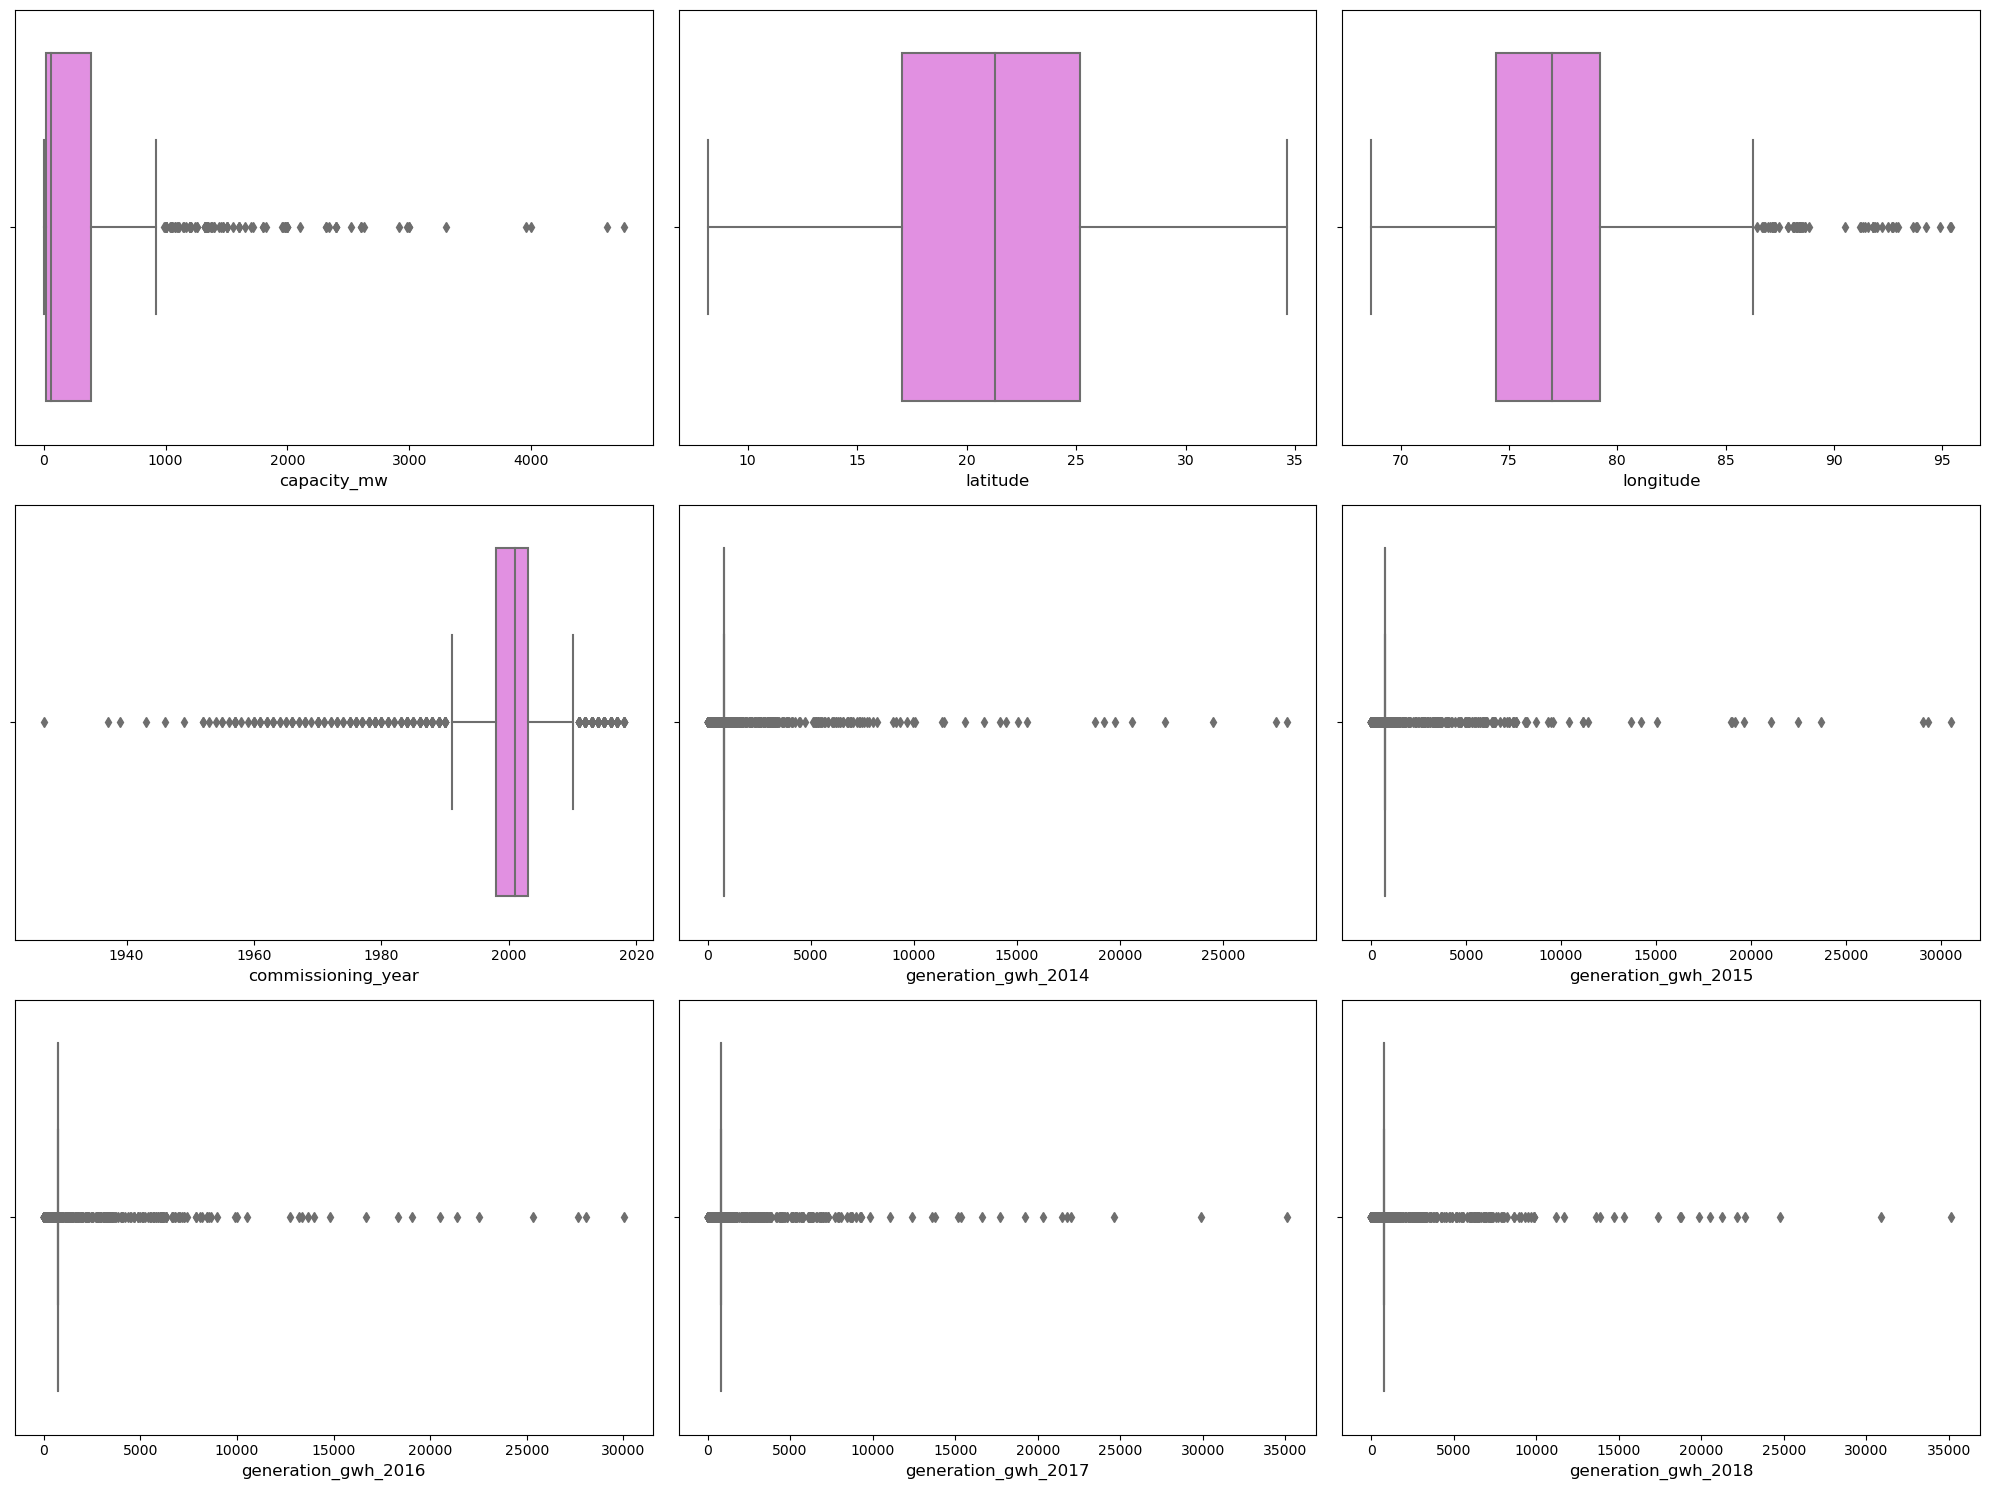

In [34]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,15))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=col, data=df,color='violet')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [8]:
df.shape

(907, 13)

In [10]:
# Remove 'latitude' from the numerical_columns list
column_handled = ['capacity_mw','longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']


# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[column_handled]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(846, 13)

In [11]:
shape_diff = (df.shape[0] - df1.shape[0], df.shape[1] - df1.shape[1])
print(shape_diff)


(61, 0)


In [14]:
df_cor = df.corr()
df_cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.053430,0.263157,-0.399258,-0.003577,0.221471,-0.281067,0.239771,0.649177,0.698624,0.771628,0.788933,0.800151
latitude,0.053430,1.000000,-0.014564,-0.002374,0.037059,0.097493,0.069624,-0.203636,0.080164,0.069602,0.054649,0.070945,0.065533
longitude,0.263157,-0.014564,1.000000,-0.377932,0.029632,0.080185,-0.238364,0.267142,0.115247,0.148746,0.189751,0.191243,0.203604
primary_fuel,-0.399258,-0.002374,-0.377932,1.000000,0.006806,-0.067425,0.035757,-0.477833,-0.247812,-0.271721,-0.282330,-0.281962,-0.289959
other_fuel1,-0.003577,0.037059,0.029632,0.006806,1.000000,0.057973,0.028661,-0.022973,-0.000743,0.005719,0.015175,0.011257,0.022395
commissioning_year,0.221471,0.097493,0.080185,-0.067425,0.057973,1.000000,0.079711,-0.055035,0.055515,0.122384,0.192343,0.209235,0.202943
source,-0.281067,0.069624,-0.238364,0.035757,0.028661,0.079711,1.000000,-0.497294,-0.140080,-0.153732,-0.156141,-0.152218,-0.160957
geolocation_source,0.239771,-0.203636,0.267142,-0.477833,-0.022973,-0.055035,-0.497294,1.000000,0.112280,0.123223,0.125154,0.122010,0.129014
generation_gwh_2014,0.649177,0.080164,0.115247,-0.247812,-0.000743,0.055515,-0.140080,0.112280,1.000000,0.913705,0.802119,0.754073,0.753995
generation_gwh_2015,0.698624,0.069602,0.148746,-0.271721,0.005719,0.122384,-0.153732,0.123223,0.913705,1.000000,0.909054,0.835419,0.832551


In [15]:
df=df1
df1.shape

(846, 13)

In [16]:
# Programe to calculate features which are 85% correlated with each other
correlation_threshold = 0.85
mask = df_cor.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_cor.columns)):
    for j in range(i+1, len(df_cor.columns)):
        if mask.iloc[i, j]:
            colname_i = df_cor.columns[i]
            colname_j = df_cor.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

#calling the programme
features_to_drop 

{'generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018'}

In [17]:
# Dropping those columns
df.drop(columns=['generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018'],axis=1, inplace=True)

df.shape

(846, 10)

In [18]:
df.drop(columns='other_fuel1', inplace=True)
df.shape

(846, 9)

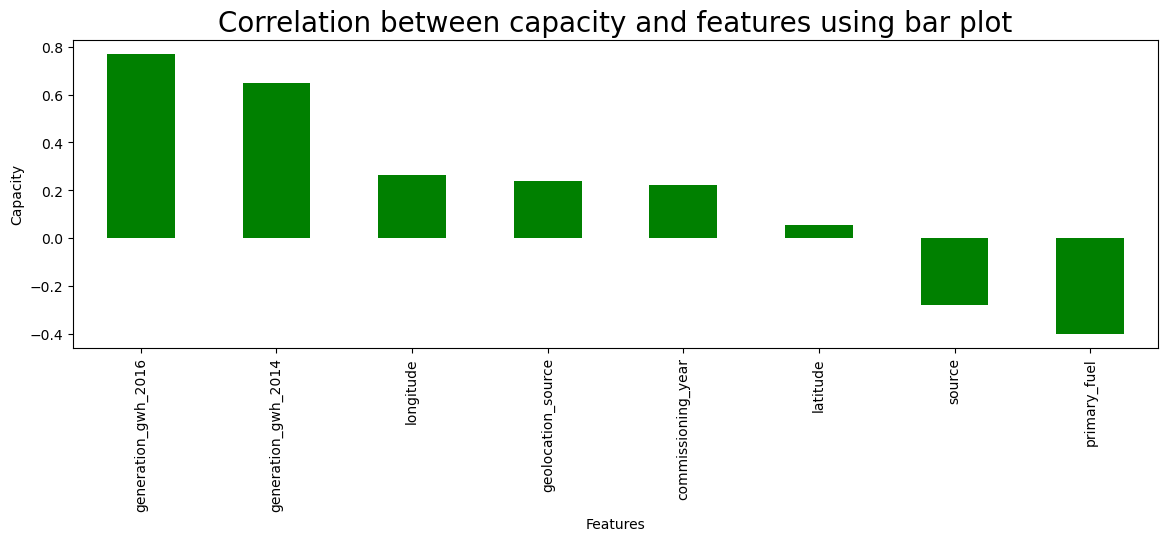

In [53]:
plt.figure(figsize=(14,4))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='green')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

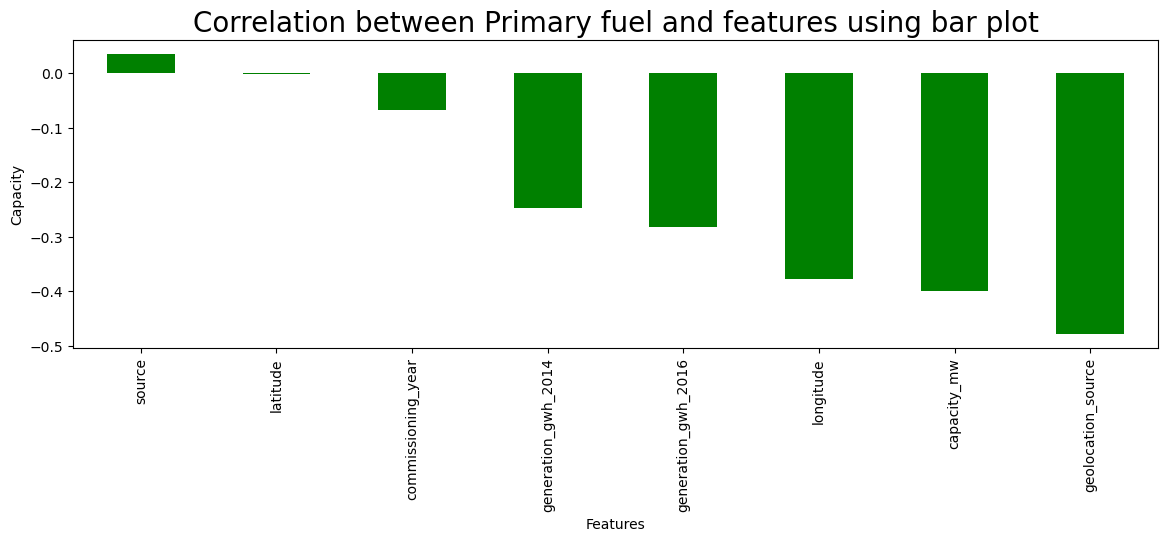

In [54]:
plt.figure(figsize=(14,4))
df1.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='green')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between Primary fuel and features using bar plot',fontsize=20)
plt.show()

In [19]:
# Splitting data in target and dependent feature
X = df.drop(['capacity_mw'], axis =1)
Y = df['capacity_mw']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((846, 8), (846,))

In [20]:
# Splitting data in target and dependent feature
X1 = df1.drop(['primary_fuel'], axis =1)
Y1 = df1['primary_fuel']

# Checking the dimenstion of X & Y
X1.shape, Y1.shape

((846, 8), (846,))

In [21]:
X.skew()

latitude              -0.118531
longitude              0.921631
primary_fuel           0.404222
commissioning_year    -1.288240
source                 1.724898
geolocation_source    -2.056692
generation_gwh_2014    2.961146
generation_gwh_2016    2.699308
dtype: float64

In [21]:
#initiating Powertransform
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
transform = power_transform(X)

pd.DataFrame(transform).skew()

0   -0.070397
1    0.000590
2   -0.060758
3   -0.323194
4   -0.169204
5   -2.030019
6    0.234988
7    0.154255
dtype: float64

In [48]:
X1.skew()

capacity_mw            1.992633
latitude              -0.118531
longitude              0.921631
commissioning_year    -1.288240
source                 1.724898
geolocation_source    -2.056692
generation_gwh_2014    2.961146
generation_gwh_2016    2.699308
dtype: float64

In [22]:
#initiating Powertransform 
transform1 = power_transform(X1)

pd.DataFrame(transform1).skew()

0    0.015186
1   -0.070397
2    0.000590
3   -0.323194
4   -0.169204
5   -2.030019
6    0.234988
7    0.154255
dtype: float64

In [23]:
# Initiate over-sampler
sm=SMOTE()

X1,Y1=sm.fit_resample(X1,Y1)

In [24]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(X_scale, columns=X.columns)
scaled_df

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2016
0,1.162213,-0.884486,1.169593,1.017502,1.391906,-1.031579,-0.274829,-0.306339
1,0.601048,-0.566725,-0.981441,0.117077,2.812646,0.408546,-0.274829,-0.306339
2,0.131029,-1.782637,1.599800,0.117077,-0.531557,0.408546,-0.274829,-0.306339
3,0.454073,3.323413,-0.551234,0.387204,-0.509699,0.408546,-0.398047,-0.213206
4,0.140306,1.244695,-0.981441,1.377672,-0.509699,0.408546,1.226920,3.139707
...,...,...,...,...,...,...,...,...
841,-0.789946,0.071398,-0.981441,1.467715,-0.509699,0.408546,-0.274829,-0.621545
842,-1.348501,0.259179,1.169593,0.117077,0.692465,-2.471705,-0.274829,-0.306339
843,-0.957281,-0.340974,1.599800,0.117077,-0.531557,0.408546,-0.274829,-0.306339
844,0.532692,-0.766745,-0.981441,0.117077,0.299030,0.408546,-0.274829,-0.306339


In [25]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df1 = pd.DataFrame(X1_scale, columns=X1.columns)
scaled_df1

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2016
0,-0.619115,1.482381,-0.871644,1.272644,1.240850,-1.172590,-0.293809,-0.300701
1,-0.402419,0.876402,-0.490233,0.193000,2.611615,0.370989,-0.293809,-0.300701
2,-0.535840,0.368848,-1.949701,0.193000,-0.614955,0.370989,-0.293809,-0.300701
3,-0.318464,0.717690,4.179127,0.516893,-0.593866,0.370989,-0.414959,-0.211694
4,3.459518,0.378866,1.684027,1.704502,-0.593866,0.370989,1.182733,2.992692
...,...,...,...,...,...,...,...,...
1859,-0.566926,-0.511498,-0.402798,0.193000,-0.614955,0.370989,-0.293809,-0.300701
1860,-0.602625,-1.859566,0.323015,0.193000,-0.614955,0.370989,-0.293809,-0.300701
1861,-0.586842,-1.744011,0.303752,0.193000,-0.614955,0.370989,-0.293809,-0.300701
1862,-0.511412,-0.946424,0.179100,0.193000,-0.614955,0.370989,-0.293809,-0.300701


# 7. Best Model Selection

In [26]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X_scale, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

,Model,Best R2 Score,Best Random State,MSE,MAE
10,XGBRegressor,0.856358,63,31898.600372,94.127267
5,KNeighbors,0.847958,53,24712.798069,89.329442
6,RandomForest,0.847625,63,32782.248455,99.983653
9,GradientBoostingRegressor,0.847434,67,29590.194287,84.445461
8,Bagging Regressor,0.836002,47,28609.187676,86.168612
2,Lasso,0.800714,40,44159.301019,142.433946
0,Linear Regression,0.800682,40,44166.345406,142.410071
1,Ridge,0.800433,40,44221.575686,142.453020
7,SGDRegressor,0.799337,40,44445.044878,142.570046
11,AdaBoostRegressor,0.780434,60,56397.653442,170.857760


In [28]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=63)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(XGBRegressor(), 
                                   param_distributions=param_grid, 
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_XGB = XGBRegressor(**best_params)

# Perform cross-validation to calculate the R-squared score
cv_scores = cross_val_score(best_XGB, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data
best_XGB.fit(train_x, train_y)

# Make predictions on the test data
y_pred_XGB = best_XGB.predict(test_x)

# Evaluate the best model
r2_score_XGB = r2_score(test_y, y_pred_XGB)
print('Best R-squared Score (XGB):', r2_score_XGB)

mse = mean_squared_error(test_y, y_pred_XGB)
print('Mean Squared Error (MSE) (XGB):', mse)

mae = mean_absolute_error(test_y, y_pred_XGB)
print('Mean Absolute Error (MAE) (XGB):', mae)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores:', cv_scores.mean())

Best R-squared Score (XGB): 0.7995476690501919
Mean Squared Error (MSE) (XGB): 40744.338829928725
Mean Absolute Error (MAE) (XGB): 116.61319889212554
Cross-Validated R-squared Scores: 0.7554965139217422


In [29]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=67)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object with parallel processing
random_search = RandomizedSearchCV(estimator=GB_model, param_distributions=param_grid,
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_GBR = GradientBoostingRegressor(**best_params)

# Perform cross-validation to calculate the R-squared score
cv_scores = cross_val_score(best_GBR, X, Y, cv=5, scoring='r2')

# Fit the best regressor on the training data
best_GBR.fit(train_x, train_y)

# Make predictions on the test data
y_pred_GBR = best_GBR.predict(test_x)

# Evaluate the best model
r2_score_GBR = r2_score(test_y, y_pred_GBR)
print('Best R-squared Score (GBR):', r2_score_GBR)

mse = mean_squared_error(test_y, y_pred_GBR)
print('Mean Squared Error (MSE) (GBR):', mse)

mae = mean_absolute_error(test_y, y_pred_GBR)
print('Mean Absolute Error (MAE) (GBR):', mae)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores (GBR):', cv_scores.mean())

Best R-squared Score (GBR): 0.7870754368996539
Mean Squared Error (MSE) (GBR): 40758.48763077802
Mean Absolute Error (MAE) (GBR): 100.4149817602204
Cross-Validated R-squared Scores (GBR): 0.7186819934743303


Amongst The Two Regressor model XGB Regressor And GradientBoosting Regressor The former has performed better than the later by having the Best R2 Squared Score. Thus it should be taken to be the best model For predicting Capacity_Mw

In [30]:
# Initialize all the classification models
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
GNB_model = GaussianNB()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (GNB_model, "GaussianNB"),
    (ET_model, "ExtraTrees Classifier"),
]
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    
    for random_state in range(1, 101):  # Try different random states
        cross_val_scores = cross_val_score(model, X1, Y1, cv=5)
        mean_accuracy = np.mean(cross_val_scores)

        X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)
    
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
6,ExtraTrees Classifier,30,0.959786,0.959395,0.959786,0.959455,373.0,"[[[46, 0, 0, 0, 0, 0, 0, 0], [0, 35, 2, 1, 2, ..."
4,Random Forest Classifier,30,0.946381,0.945664,0.946381,0.945175,373.0,"[[[46, 0, 0, 0, 0, 0, 0, 0], [1, 31, 2, 3, 4, ..."
1,Decision Tree Classifier,15,0.924933,0.926399,0.924933,0.925304,373.0,"[[[44, 2, 0, 0, 0, 0, 0, 1], [1, 30, 2, 1, 0, ..."
3,K-Neighbors Classifier,75,0.804290,0.803726,0.804290,0.798116,373.0,"[[[42, 0, 0, 0, 0, 1, 0, 0], [2, 27, 4, 3, 7, ..."
5,GaussianNB,15,0.627346,0.564477,0.627346,0.547622,373.0,"[[[46, 0, 0, 0, 0, 0, 0, 1], [11, 5, 0, 13, 5,..."
0,Logistic Regression,64,0.546917,0.539950,0.546917,0.523308,373.0,"[[[31, 0, 0, 0, 0, 0, 2, 7], [5, 8, 1, 3, 11, ..."
2,Support Vector Classifier,90,0.482574,0.411488,0.482574,0.399603,373.0,"[[[0, 0, 0, 0, 0, 0, 27, 23], [0, 3, 5, 1, 10,..."


In [31]:
# Data splitting for train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state=30)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=ET_model, param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a classifier with the best parameters
best_et = ExtraTreesClassifier(**best_params)

# Fit the best classifier on the training data
best_et.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_et = best_et.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_et)
print("Best Accuracy (ExtraTrees):", accuracy)

Best Accuracy (ExtraTrees): 0.9597855227882037


In [33]:
# Data splitting for train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.2, random_state= 30)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RFR_model, param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_rf)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9490616621983914


Amongst The Two Regressor model Extra Trees Classifier with Best performing random state 30 And Random Forest Classifier with best random state as 30. The former has performed better than the later by having the Best Accuracy Score. Thus it should be taken to be the best model For predicting Primary Fuel

# 8. Saving the Best Models

A.Capacity_Mw model

In [ ]:
filename = 'globalPlant_capacity_model.pkl'
pickle.dump(best_XGB, open(filename, 'wb')) 

B.Primary Fuel Model

In [ ]:
filename = 'globalPlant_fuel_model.pkl'
pickle.dump(best_et, open(filename, 'wb')) 